In [239]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
test_split = 0.2
max_depth = 3

In [241]:
data = load_wine()
list_fl = data.target_names
x = data.data
y = data.target

In [242]:
list_features  = [
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
len(list_features),len(x[0])

(13, 13)

In [244]:
df_dict = {}
for i,f in enumerate(list_features):
        df_dict[f]= []
        
for val in x:
    for i,f in enumerate(list_features):
        df_dict[f].append(val[i]) 

In [ ]:
df = pd.DataFrame(df_dict)
df['Y'] = y
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_split, random_state=42)

In [247]:
model = RandomForestClassifier(n_estimators = 100) 

model.fit(x_train, y_train)

RandomForestClassifier()

In [248]:
predictions = model.predict(x_test)

In [249]:
predictions[:5], list(map( lambda x: list_fl[x], list(predictions)))[:5]

(array([0, 0, 2, 0, 1]),
 ['class_0', 'class_0', 'class_2', 'class_0', 'class_1'])

In [250]:
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

report = classification_report(y_test, predictions, target_names=list_fl)
print(report)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



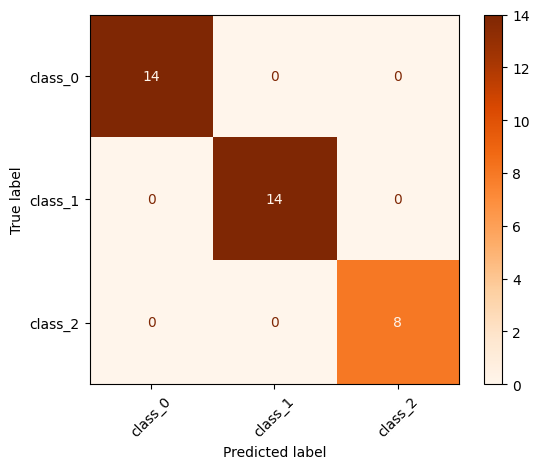

In [251]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
show_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=list_fl)
show_cm.plot(xticks_rotation=45, cmap='Oranges')